In [1]:
#for roc curve, change position label, the example he has does not work!

# Homework 4- Question 2
### Ryan Peralta
### CS 4661
### Fall 2019

In [2]:
# Importing numpy and pandas
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

### a.) Read the Heart_Short data set from the given link
https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv

In [3]:
heart_short_df = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")
heart_short_df.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


### b.) Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features

In [4]:
# Creating the Feature Matrix for the Heart_Short dataset:

# create a python list of feature names that would like to pick from the dataset:
cols = list(heart_short_df.columns.values)
feature_cols = cols[:-1]
print(feature_cols)


# use the above list to select the features from the original DataFrame
X = heart_short_df[feature_cols]  

# Creating the label vector by selecting the last column of the dataset
y = heart_short_df[cols[-1]]


# print the first 5 rows
X.head()

['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']


,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,63,145,233,2,150,2.3
1,67,160,286,2,108,1.5
2,67,120,229,2,129,2.6
3,37,130,250,0,187,3.5
4,41,130,204,2,172,1.4


In [5]:
#This technique of normalizing the data in the df was found at:
#https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
from sklearn import preprocessing
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

#Rename Cols
X.columns = feature_cols
X.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,0.708333,0.481132,0.244292,1.0,0.603053,0.370968
1,0.791667,0.622642,0.365297,1.0,0.282443,0.241935
2,0.791667,0.245283,0.235160,1.0,0.442748,0.419355
3,0.166667,0.339623,0.283105,0.0,0.885496,0.564516
4,0.250000,0.339623,0.178082,1.0,0.770992,0.225806


### c.) Split the  dataset  into  testing  and training sets

In [6]:
# Splitting the dataset with  the  following  parameters: test_size=0.35, random_state=3

#We first need to import train_test_split from sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

### d.) Use Logistic  Regression  Classifier to predict Heart  Disease 

In [7]:

# "heart_short_logreg" is instantiated as an "object" of LogisticRegression "class". 
heart_short_logreg = LogisticRegression()

# Training ONLY on the training set:
heart_short_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_lr = heart_short_logreg.predict(X_test)
#print(y_predict_lr)

# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_lr = accuracy_score(y_test, y_predict_lr)

print(score_lr)




0.704225352112676


C:\Users\rpera\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
# Predicting the Binary Label:
y_predict_lr = heart_short_logreg.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = heart_short_logreg.predict_proba(X_test)


from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label='Yes')

print(fpr)
print(tpr)




[0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.12195122 0.12195122 0.19512195 0.19512195 0.2195122  0.2195122
 0.31707317 0.31707317 0.41463415 0.41463415 0.56097561 0.56097561
 0.6097561  0.6097561  0.70731707 0.70731707 0.73170732 0.73170732
 0.75609756 0.75609756 0.82926829 0.82926829 1.        ]
[0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.53333333 0.53333333 0.6        0.6        0.7
 0.7        0.73333333 0.73333333 0.8        0.8        0.83333333
 0.83333333 0.86666667 0.86666667 0.9        0.9        0.93333333
 0.93333333 0.96666667 0.96666667 1.         1.        ]


In [9]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7577235772357724


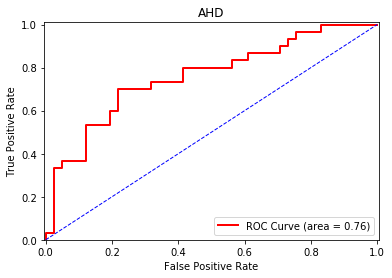

In [10]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AHD')
plt.legend(loc="lower right")

plt.show()